In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import pdet
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn
from default import *

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

ver='try2'
gver='basic2Shift'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#nver='var1em9' # 'var0em0'#
nver='var7em3' # 'var0em0'#
#nver='var0em0' # 'var0em0'#
mm1=[]
mm2=[]
for _i in range(200):
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()
Const  =   20.
noirev =   True
ellM1  =   fpfs.catalog.fpfsM2E(mm1,const=Const,noirev=noirev)
ellM2  =   fpfs.catalog.fpfsM2E(mm2,const=Const,noirev=noirev)
gc.collect()

0

In [20]:
fs1=fpfs.catalog.summary_stats(mm1,ellM1,use_sig=False)
selnm=['M00','R2','detect']
cutsig=[sigM,sigR,sigP]

# clean outcome
fs1.clear_outcomes()
cut=[10**((27.-cutM)/2.5),cutR,cutP]
# weight array
fs1.update_selection_weight(selnm,cut,cutsig)

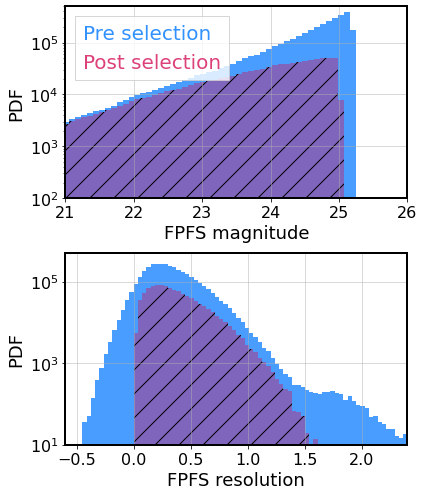

In [22]:
precut= -0.12
nbins=   80
m1   =   -2.5 * np.log10(mm1['fpfs_M00']*1.904) + 27.
r2   =   (mm1['fpfs_M20']+mm1['fpfs_M00'])/(mm1['fpfs_M00'])
msk=(mm1['fpfs_v0']>precut)&(mm1['fpfs_v2']>precut)&(mm1['fpfs_v4']>precut)&(mm1['fpfs_v6']>precut)
msk=msk&(mm1['fpfs_v1']>precut)&(mm1['fpfs_v3']>precut)&(mm1['fpfs_v5']>precut)&(mm1['fpfs_v7']>precut)
msk=msk&(m1<25.2)
plt.close()
fig,axes=pltutil.make_figure_axes(nx=1,ny=2,square=False)
ax=axes[0]
ax.hist(m1[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(20,27),\
        label='Pre selection',alpha=0.8,histtype='stepfilled')
ax.hist(m1,bins=nbins,density=False,weights=fs1.ws,linewidth=2.,color=pltutil.colors[2],range=(20,27),\
        label='Post selection',alpha=0.4,histtype='stepfilled',hatch='/')

leg=ax.legend(loc='upper left',fontsize=20,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    text.set_color(pltutil.colors[it+1])
ax.set_xlim(21,26.)
ax.set_ylim(1e2,5e5)
ax.set_yscale('log')
ax.set_xlabel('FPFS magnitude')
ax.set_ylabel('PDF')
ax.grid()

ax=axes[1]
ax.hist(r2[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(-0.6,2.4),\
        alpha=0.8,histtype='stepfilled')
ax.hist(r2,bins=nbins,density=False,weights=fs1.ws,linewidth=2.,\
        color=pltutil.colors[2],range=(-0.6,2.4),\
        alpha=0.4,histtype='stepfilled',hatch='/')
ax.set_xlim(-0.6,2.4)
ax.set_ylim(1e1,5e5)
ax.set_yscale('log')
ax.set_xlabel('FPFS resolution')
ax.set_ylabel('PDF')
ax.grid()
fig.tight_layout()


gc.collect()
fig.savefig('obsHist_shifted_det.pdf')

In [24]:
0.168*128/60

0.3584